<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Deep_Learning_and_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning and Reinforcement Learning

## Sections required in your report:

1. Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data. 

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis. 

3. Brief summary of data exploration and actions taken for data cleaning or feature engineering. 

4. Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters. 

5. A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability. 

6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise. 

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## The grading will center around 5 main points:

1. Does the report include a section describing the data? 

2. Does the report include a paragraph detailing the main objective(s) of this analysis?  

3. Does the report include a section with variations of a Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis? 

4. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis? 

5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques?

# General Section

In [ ]:
%%bash
pip install --upgrade pandas --quiet
pip install --upgrade scikit-learn --quiet
pip install --upgrade imbalanced-learn --quiet
pip install pyproj --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


## Import needed libraries

In [ ]:
import os
import seaborn as sns
from colorsetup import colors, palette
sns.set_palette(palette)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
pd.__version__

'1.3.2'

In [ ]:
import urllib.request
from zipfile import ZipFile
from pathlib import Path
from import_dataset import (load_data, basic_preprocessing,
                            add_dayof_week, add_timeof_day,
                            add_crow_direction, add_avespeed,
                            add_toll_source, add_toll_paid, filter_toll)

## Download Data

In [ ]:
DATA_URL = "https://www.mathworks.com/supportfiles/practicaldsmatlab/taxi/Taxi%20Data.zip"
DATA_NAME = "TaxiData.zip"
urllib.request.urlretrieve(DATA_URL, DATA_NAME)

('TaxiData.zip', <http.client.HTTPMessage at 0x7f015a81d1d0>)

In [ ]:
# Create a ZipFile Object and load data in it
with ZipFile(DATA_NAME, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
DATA_DIR = Path.cwd() / 'Taxi Data'
DATA_DIR

PosixPath('/content/Taxi Data')

In [ ]:
IMAGES_PATH = Path.cwd() / 'images'
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Import and Explore Data

In [ ]:
col_names = ["Vendor", "PickupTime", "DropoffTime", "Passengers", "Distance", "PickupLon", "PickupLat",
             "RateCode", "HeldFlag", "DropoffLon", "DropoffLat", "PayType", "Fare", "ExtraCharge", "Tax",
             "Tip", "Tolls", "ImpSurcharge", "TotalCharge"];

In [ ]:
use_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

In [ ]:
dtype = {'RateCodeID': str, 'payment_type': str, 'VendorID': str, 'RatecodeID': str,}  # , dtype=dtype

In [ ]:
original = load_data(path_dir=DATA_DIR, parse_dates=parse_dates, 
                     usecols=use_cols, dtype=dtype,
                      file_substr='yellow', skiprows=1, preprocess=True, )

Loading all yellow*.csv in /content/Taxi Data folder...

Converting categorical features to their corresponding values...

Removing invalid charges...

Removing invalid trip information...

Keep trips with pickup and drop off locations inside the region of interest

Adding new features: Duration...

Only keep trips with typical values..



In [ ]:
df = original.copy(deep=True)

In [ ]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823895 entries, 0 to 2823894
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2823895 non-null  object        
 1   tpep_pickup_datetime   2823895 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2823895 non-null  datetime64[ns]
 3   passenger_count        2823895 non-null  int64         
 4   trip_distance          2823895 non-null  float64       
 5   pickup_longitude       2823895 non-null  float64       
 6   pickup_latitude        2823895 non-null  float64       
 7   RateCodeID             2823895 non-null  object        
 8   store_and_fwd_flag     2823895 non-null  object        
 9   dropoff_longitude      2823895 non-null  float64       
 10  dropoff_latitude       2823895 non-null  float64       
 11  payment_type           2823895 non-null  object        
 12  fare_amount            28238

In [ ]:
df.shape

(2823895, 20)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,"Creative Mobile Technologies, LLC",2015-04-04 18:38:47,2015-04-04 18:52:47,1,2.00,-73.987144,40.760750,Standard rate,N,-73.997025,40.737534,Credit card,10.5,0.0,0.5,2.25,0.0,0.3,13.55,14.000000
1,"Creative Mobile Technologies, LLC",2015-04-15 19:35:14,2015-04-15 19:45:50,2,1.50,-73.971695,40.760284,Standard rate,N,-73.955284,40.768768,Credit card,8.5,1.0,0.5,2.05,0.0,0.3,12.35,10.600000
2,VeriFone Inc.,2015-04-10 16:15:53,2015-04-10 16:24:29,2,1.22,-73.981773,40.771370,Standard rate,N,-73.975090,40.787529,Cash,7.5,1.0,0.5,0.00,0.0,0.3,9.30,8.600000
3,"Creative Mobile Technologies, LLC",2015-04-21 08:55:53,2015-04-21 09:08:24,1,1.60,-73.963989,40.770832,Standard rate,N,-73.976410,40.763741,Credit card,9.5,0.0,0.5,2.05,0.0,0.3,12.35,12.516667
4,VeriFone Inc.,2015-04-02 21:06:41,2015-04-02 21:13:17,1,1.29,-73.992554,40.758415,Standard rate,N,-73.995453,40.744347,Credit card,6.5,0.5,0.5,1.56,0.0,0.3,9.36,6.600000


In [ ]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
2823890,"Creative Mobile Technologies, LLC",2015-09-30 23:59:45,2015-10-01 00:16:53,1,1.9,-73.972404,40.762554,Standard rate,N,-73.992828,40.754547,Cash,12.0,0.5,0.5,0.00,0.0,0.3,13.30,17.133333
2823891,"Creative Mobile Technologies, LLC",2015-09-19 12:03:09,2015-09-19 12:11:54,1,1.2,-73.996628,40.737476,Standard rate,N,-73.994858,40.750084,Credit card,7.5,1.0,0.5,2.00,0.0,0.3,11.30,8.750000
2823892,"Creative Mobile Technologies, LLC",2015-09-20 00:41:25,2015-09-20 00:53:23,1,1.7,-73.984802,40.745243,Standard rate,N,-73.964851,40.754166,Credit card,9.5,1.0,0.5,2.25,0.0,0.3,13.55,11.966667
2823893,"Creative Mobile Technologies, LLC",2015-09-20 13:24:59,2015-09-20 13:31:28,1,1.2,-73.955750,40.779633,Standard rate,N,-73.970543,40.788414,Cash,6.5,0.0,0.5,0.00,0.0,0.3,7.30,6.483333
2823894,"Creative Mobile Technologies, LLC",2015-09-20 23:13:08,2015-09-20 23:20:57,1,2.1,-73.983444,40.765400,Standard rate,N,-73.977379,40.788872,Cash,8.5,0.5,0.5,0.00,0.0,0.3,9.80,7.816667


In [ ]:
# Add features
df = add_timeof_day(df)
df = add_dayof_week(df)
df = add_avespeed(df)
df = add_toll_paid(df)
df = add_toll_source(df)

In [ ]:
df.describe(include=[object, bool], )

,VendorID,RateCodeID,store_and_fwd_flag,payment_type,day_of_week,toll_paid,toll_source
count,2823701,2823701,2823701,2823701,2823701,2823701,2823701
unique,2,6,2,4,7,2,11
top,VeriFone Inc.,Standard rate,N,Credit card,Saturday,NoToll,NoToll
freq,1502987,2764846,2801375,1780318,435155,2682515,2682515


In [ ]:
df.toll_source.value_counts(normalize=True).to_frame()

,toll_source
NoToll,0.950000
MTA_Other,0.048879
HH,0.000472
NYPA,0.000203
OtherToll,0.000176
VN,0.000112
VN_MTA_Other,0.000067
CBGH,0.000053
CBGH_MTA_Other,0.000016
NYPA_MTA_Other,0.000012


In [ ]:
df.toll_paid.value_counts(normalize=True).to_frame()

,toll_paid
NoToll,0.95
Toll,0.05


In [ ]:
df.toll_paid.value_counts().to_frame()

,toll_paid
NoToll,2682515
Toll,141186


### Visualize and Calculate metrics

In [ ]:
# Extract features base on above correlation
label = ['toll_paid']

Saving figure toll_paid_dist


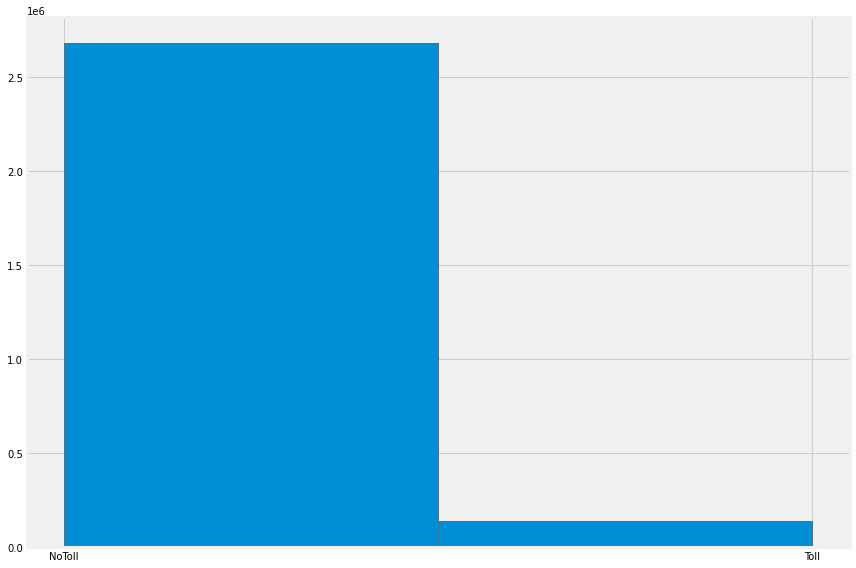

In [ ]:
bin_size = len(np.unique(df[label].values))
df.toll_paid.hist(bins=bin_size, figsize=(12, 8), grid=True)
save_fig('toll_paid_dist')

Saving figure toll_paid_bar


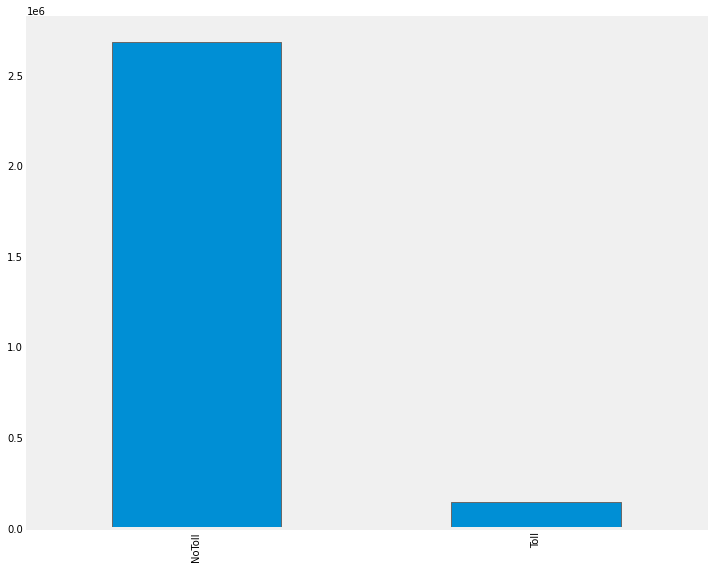

In [ ]:
df['toll_paid'].value_counts().plot(kind='bar', grid=False, figsize=(10, 8))
save_fig('toll_paid_bar')

In [ ]:
# drop mta_tax and improvement_surchage
df.drop(columns=['mta_tax', 'improvement_surcharge'], axis=1, inplace=True)

In [ ]:
corr_matrix = df.corr()
corr_matrix['duration'].sort_values(ascending=False).to_frame()

,duration
duration,1.000000
fare_amount,0.888203
total_amount,0.862494
trip_distance,0.781401
tip_amount,0.493078
tolls_amount,0.457660
pickup_longitude,0.370568
dropoff_longitude,0.266498
ave_speed,0.159938
time_of_day,0.032376


## Choose target and feature variables/columns

In [ ]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 1. without amount
features1 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 2. without amount + 3 new features (1 categorical variable)
features2 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'time_of_day', 'day_of_week', 'ave_speed', ]
# 3. Above abs(0.1)
features3 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'ave_speed',  ]
# 4. Above abs(0.1) + 2 new features (1 categorical variable)
features4 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'extra',
             'mta_tax', 'time_of_day', 'day_of_week', 'ave_speed', ]
# 5. all features i.e 5 categorical features
all_features = list(set(df.columns.to_list()) - set(label + ['tpep_pickup_datetime', 'tpep_dropoff_datetime',]))

In [ ]:
features = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'ave_speed',  'time_of_day', 'day_of_week', ]

# General sklearn imports

In [ ]:
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder, OneHotEncoder,
                                   PolynomialFeatures, MinMaxScaler, LabelEncoder)

# Transform target variable

In [ ]:
df.shape

(2823701, 23)

In [ ]:
le = LabelEncoder()
df[label[0]] = le.fit_transform(df[label].values.ravel())

In [ ]:
le.classes_

array(['NoToll', 'Toll'], dtype=object)

# Train and Test, Split

In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, ShuffleSplit

In [ ]:
y = df[label]
X = df[features]

In [ ]:
X.head()

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,total_amount,tip_amount,ave_speed,time_of_day,day_of_week
0,2.00,-73.987144,40.760750,-73.997025,40.737534,10.5,13.55,2.25,8.571429,18.646389,Saturday
1,1.50,-73.971695,40.760284,-73.955284,40.768768,8.5,12.35,2.05,8.490566,19.587222,Wednesday
2,1.22,-73.981773,40.771370,-73.975090,40.787529,7.5,9.30,0.00,8.511628,16.264722,Friday
3,1.60,-73.963989,40.770832,-73.976410,40.763741,9.5,12.35,2.05,7.669774,8.931389,Tuesday
4,1.29,-73.992554,40.758415,-73.995453,40.744347,6.5,9.36,1.56,11.727273,21.111389,Thursday


In [ ]:
pd.DataFrame(le.inverse_transform(y.values.ravel())).value_counts()

NoToll    2682515
Toll       141186
dtype: int64

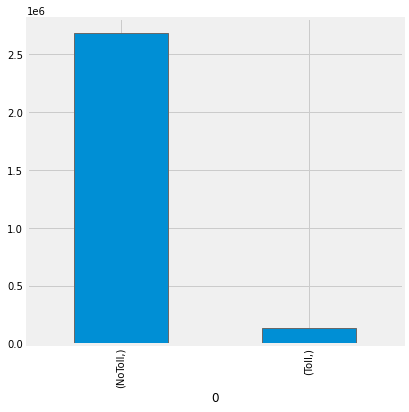

In [ ]:
pd.DataFrame(le.inverse_transform(y.values.ravel())).value_counts().plot(kind='bar', grid=True, figsize=(6, 6),)

In [ ]:
y.shape

(2823701, 1)

In [ ]:
# Get the split indexes
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.03, random_state=42)

train_idx, test_idx = next(strat_split.split(X, y))


# Create the dataframes
X_train_val = X.loc[train_idx, :]
y_train_val = y.loc[train_idx, :]

X_test  = X.loc[test_idx, :]
y_test  = y.loc[test_idx, :]

In [ ]:
X_train_val.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train_val.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [ ]:
y_test.value_counts(normalize=True)

toll_paid
0            0.949995
1            0.050005
dtype: float64

In [ ]:
y_test.value_counts()

toll_paid
0            80476
1             4236
dtype: int64

In [ ]:
print(f'Train/Val data shape: {X_train_val.shape}\n')
print(f'Test data shape: {X_test.shape}\n')

Train/Val data shape: (2738989, 11)

Test data shape: (84712, 11)



# Preprocess Pipelines

## Undersample training data

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Counter(y_train_val.values.ravel())

Counter({0: 2602039, 1: 136950})

In [ ]:
# undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42, replacement=False)
undersample = RandomUnderSampler(sampling_strategy=0.9, random_state=42, replacement=False)
X_train_val, y_train_val = undersample.fit_resample(X_train_val, y_train_val)

In [ ]:
Counter(y_train_val.values.ravel())

Counter({0: 152166, 1: 136950})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f013d269450>]],
      dtype=object)

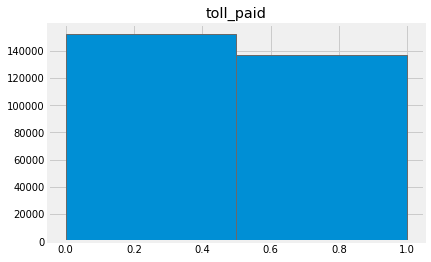

In [ ]:
y_train_val.hist(bins=2, )

Saving figure balanced


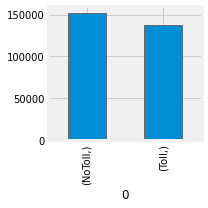

In [ ]:
pd.DataFrame(le.inverse_transform(y_train_val.values.ravel())).value_counts().plot(kind='bar', grid=True, figsize=(3, 3),)
save_fig('balanced')

In [ ]:
X_train_val.shape

(289116, 11)

## Training and validation data after sampling

In [ ]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, val_idx = next(strat_split.split(X_train_val, y_train_val))


# Create the dataframes
X_train = X_train_val.loc[train_idx, :]
y_train = y_train_val.loc[train_idx, :]

X_val  = X_train_val.loc[val_idx, :]
y_val  = y_train_val.loc[val_idx, :]

In [ ]:
X_train.reset_index(inplace=True, drop=True)
X_val.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_val.reset_index(inplace=True, drop=True)

In [ ]:
print(f'Train data shape: {X_train.shape}\n')
print(f'Validation data shape: {X_val.shape}\n')
print(f'Test data shape: {X_test.shape}\n')

Train data shape: (231292, 11)

Validation data shape: (57824, 11)

Test data shape: (84712, 11)



In [ ]:
Counter(y_test.values.ravel())

Counter({0: 80476, 1: 4236})

## Build categorical and numerical pipeline



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

In [ ]:
numerical_cols, categorical_cols

(Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
        'tip_amount', 'ave_speed', 'time_of_day'],
       dtype='object'), Index(['day_of_week'], dtype='object'))

In [ ]:
num_pipeline = Pipeline([("num", StandardScaler()),])
num_pipeline

Pipeline(steps=[('num', StandardScaler())])

In [ ]:
cat_pipeline = Pipeline([("cat", OrdinalEncoder()), ])
cat_pipeline

Pipeline(steps=[('cat', OrdinalEncoder())])

In [ ]:
transformer = ColumnTransformer([
                 ("num_pipe", num_pipeline, numerical_cols),
                 ("cat_pipe", cat_pipeline, categorical_cols),
                 ])
transformer

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('num', StandardScaler())]),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'ave_speed', 'time_of_day'],
      dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('cat', OrdinalEncoder())]),
                                 Index(['day_of_week'], dtype='object'))])

# Build and Train Models

In [ ]:
models = dict()

## Base Model (Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100, verbose=1, n_jobs=1)
rfc = Pipeline([('preparation', transformer), 
                     ('model', rfc)
                     ])

In [ ]:
rfc.fit(X_train_val, y_train_val.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'ave_speed', 'time_of_day'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_jobs=1, random_state=42, verbose=1))])

In [ ]:
models['base'] = rfc

In [ ]:
# Make predictions on the train set - both "hard" predictions, and the scores
y_pred_class_rf = rfc.predict(X_train_val)
y_pred_prob_rf = rfc.predict_proba(X_train_val)


print('accuracy is {:.3f}'.format(accuracy_score(y_train_val, y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_train_val, y_pred_prob_rf[:,1])))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy is 1.000
roc-auc is 1.000


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [ ]:
# Make predictions on the val set - both "hard" predictions, and the scores
y_pred_class_rf = rfc.predict(X_val)
y_pred_prob_rf = rfc.predict_proba(X_val)


print('accuracy is {:.3f}'.format(accuracy_score(y_val, y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_val, y_pred_prob_rf[:,1])))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy is 1.000
roc-auc is 1.000


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [ ]:
# Make predictions on the test set - both "hard" predictions, and the scores
y_pred_class_rf = rfc.predict(X_test)
y_pred_prob_rf = rfc.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy is 0.993
roc-auc is 1.000


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


## Train Deep Neural Network

In [ ]:
## Import Keras objects for Deep Learning
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback

In [ ]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability

X_train_norm = transformer.fit_transform(X_train)
X_val_norm = transformer.transform(X_val)
X_test_norm = transformer.transform(X_test)

In [ ]:
X_train_norm.dtype

dtype('float64')

In [ ]:
X_train_norm = X_train_norm.astype("float32")
X_val_norm = X_val_norm.astype("float32")
X_test_norm = X_test_norm.astype("float32")

In [ ]:
X_train_norm.shape

(231292, 11)

In [ ]:
X_train_norm.dtype

dtype('float32')

In [ ]:
y_train.dtypes

toll_paid    int64
dtype: object

In [ ]:
y_train = y_train.astype("int32")
y_val = y_val.astype("int32")
y_test = y_test.astype("int32")

In [ ]:
y_train.dtypes

toll_paid    int32
dtype: object

In [ ]:
X_train_norm[0:2]

array([[-0.65773875, -0.7174389 , -0.28982478, -0.1729205 ,  0.44040996,
        -0.55141443, -0.677275  , -0.8499244 , -0.8096452 ,  0.89923614,
         0.        ],
       [-0.25075468, -0.4705136 , -0.01307502,  0.08948687, -0.74972564,
        -0.31469765, -0.0545038 ,  0.35041627,  0.09687205,  0.14895587,
         2.        ]], dtype=float32)

### model 1

In [ ]:
import tensorflow.keras.backend as K
K.clear_session()

In [ ]:
input_size = X_train_norm.shape[1]
input_size

11

In [ ]:
BATCH_SIZE = 256
EPOCH = 10

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.999):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callback = myCallback()

In [ ]:
# Define the Model 
model_1 = Sequential()
model_1.add(Dense(16,input_shape = (input_size,), activation = 'relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [ ]:
#  This is a nice tool to view the model you have created and count the parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


/content/images


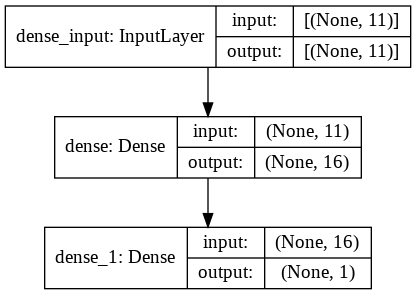

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/model_1.png"
plot_model(model_1, to_file=to_file, show_shapes=True)

In [ ]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
model_1.compile(Adam(beta_1=0.85, beta_2=0.999), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train,
                         validation_data=(X_val_norm, y_val),
                         epochs=EPOCH, batch_size=BATCH_SIZE,
                         callbacks=[callback])

Epoch 1/10
904/904 [==============================] - 6s 4ms/step - loss: 0.1766 - accuracy: 0.9397 - val_loss: 0.1261 - val_accuracy: 0.9550
Epoch 2/10
904/904 [==============================] - 3s 3ms/step - loss: 0.1107 - accuracy: 0.9596 - val_loss: 0.0958 - val_accuracy: 0.9644
Epoch 3/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0770 - accuracy: 0.9728 - val_loss: 0.0625 - val_accuracy: 0.9803
Epoch 4/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0493 - accuracy: 0.9865 - val_loss: 0.0398 - val_accuracy: 0.9911
Epoch 5/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0311 - accuracy: 0.9934 - val_loss: 0.0249 - val_accuracy: 0.9952
Epoch 6/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0193 - accuracy: 0.9963 - val_loss: 0.0152 - val_accuracy: 0.9978
Epoch 7/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.0097 - val_accuracy: 0.9986
Epoch 

In [ ]:
models['model1'] = model_1

In [ ]:
_, acc = model_1.evaluate(X_train_norm, y_train, batch_size=BATCH_SIZE, verbose=0)
acc

0.9991612434387207

In [ ]:
## We generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = (model_1.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 1.000
roc-auc is 1.000


In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

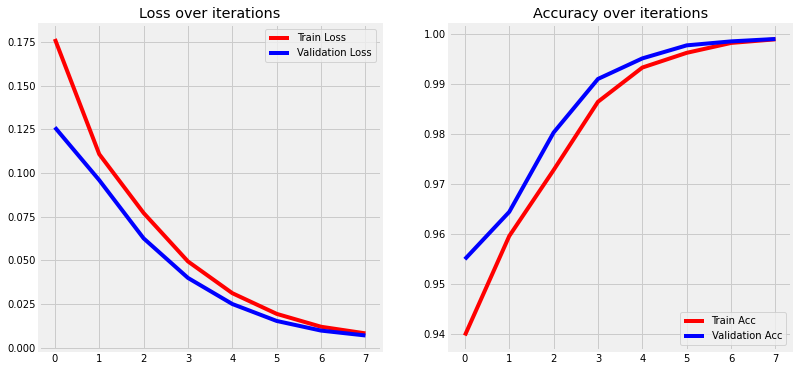

In [ ]:
n = len(run_hist_1.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_1.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (run_hist_1.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_1.history["accuracy"]),'r', label="Train Acc")
ax.plot(range(n), (run_hist_1.history["val_accuracy"]),'b', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

### model 2

In [ ]:
K.clear_session()

In [ ]:
model_2 = Sequential()
model_2.add(Dense(16, input_shape=(input_size,), activation="relu"))
model_2.add(Dense(8,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


/content/images


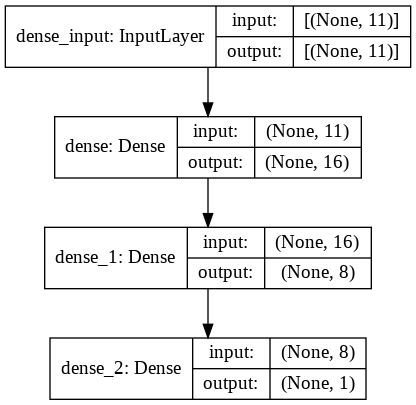

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/model_2.png"
plot_model(model_2, to_file=to_file, show_shapes=True)

In [ ]:
model_2.compile(Adam(beta_1=0.85, beta_2=0.999), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_val_norm, y_val),
                         epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[callback])

Epoch 1/10
904/904 [==============================] - 4s 4ms/step - loss: 0.1931 - accuracy: 0.9262 - val_loss: 0.1185 - val_accuracy: 0.9574
Epoch 2/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0893 - accuracy: 0.9676 - val_loss: 0.0641 - val_accuracy: 0.9786
Epoch 3/10
904/904 [==============================] - 3s 3ms/step - loss: 0.0380 - accuracy: 0.9900 - val_loss: 0.0206 - val_accuracy: 0.9958
Epoch 4/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 0.0087 - val_accuracy: 0.9985
Epoch 5/10
904/904 [==============================] - 3s 3ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9992

Reached 99% accuracy so cancelling training!


In [ ]:
models['model2'] = model_2

In [ ]:
_, acc = model_2.evaluate(X_train_norm, y_train, batch_size=BATCH_SIZE, verbose=0)
acc

0.9993471503257751

In [ ]:
## We generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

accuracy is 1.000
roc-auc is 1.000


Text(0.5, 1.0, 'Accuracy over iterations')

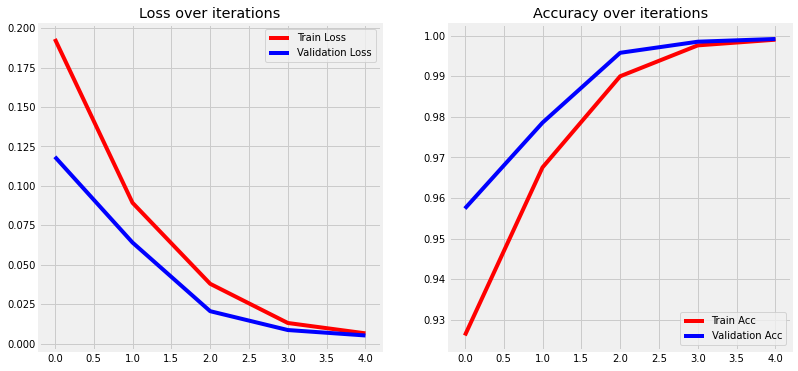

In [ ]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

### model3

In [ ]:
K.clear_session()
model_3 = Sequential()
model_3.add(Dense(16, input_shape=(input_size,), activation="relu"))
model_3.add(Dense(8,  activation="relu"))
model_3.add(Dense(4,  activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


/content/images


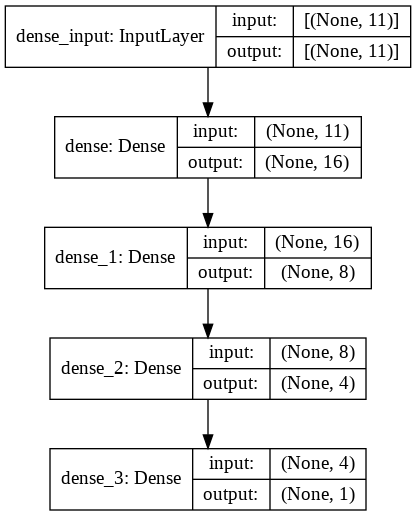

In [ ]:
# save model
print(IMAGES_PATH)
to_file = f"{IMAGES_PATH}/model_3.png"
plot_model(model_3, to_file=to_file, show_shapes=True)

In [ ]:
model_3.compile(Adam(beta_1=0.85, beta_2=0.999), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_val_norm, y_val),
                         epochs=EPOCH, batch_size=BATCH_SIZE,
                         callbacks=[callback])

Epoch 1/10
904/904 [==============================] - 4s 4ms/step - loss: 0.1832 - accuracy: 0.9336 - val_loss: 0.1134 - val_accuracy: 0.9578
Epoch 2/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0708 - accuracy: 0.9759 - val_loss: 0.0298 - val_accuracy: 0.9926
Epoch 3/10
904/904 [==============================] - 3s 4ms/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.0074 - val_accuracy: 0.9987
Epoch 4/10
904/904 [==============================] - 4s 4ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9992

Reached 99% accuracy so cancelling training!


In [ ]:
models['model3'] = model_3

In [ ]:
_, acc = model_3.evaluate(X_train_norm, y_train, batch_size=BATCH_SIZE, verbose=0)
acc

0.9993427991867065

In [ ]:
## We generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_3 = (model_3.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_3 = model_3.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test.values,y_pred_class_nn_3, )))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

accuracy is 1.000
roc-auc is 1.000


Text(0.5, 1.0, 'Accuracy over iterations')

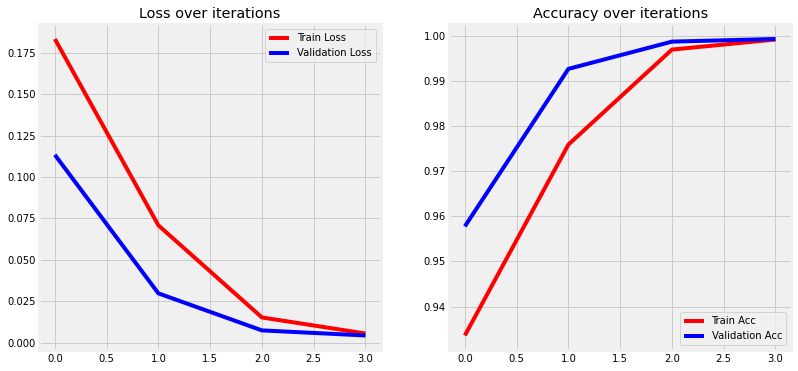

In [ ]:
n = len(run_hist_3.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_3.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (run_hist_3.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_3.history["accuracy"]),'r', label="Train Acc")
ax.plot(range(n), (run_hist_3.history["val_accuracy"]),'b', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

# Evaluation metrics

In [ ]:
models.get('base')

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('num',
                                                                   StandardScaler())]),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'ave_speed', 'time_of_day'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_jobs=1, random_state=42, verbose=1))])

In [ ]:
list(models.keys())

['base', 'model1', 'model2', 'model3']

In [ ]:
coeff_labels = list(models.keys())
coeff_models = list(models.values())

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, zero_division=0, average='binary'),
                      'recall': recall_score(y_true, y_pred, zero_division=0, average='binary'),
                      'f1': f1_score(y_true, y_pred, zero_division=0, average='binary'),
                      'auc': roc_auc_score(y_true, y_pred)
                      },
                     name=label)

In [ ]:
evaluations = []
predictions = dict()

for lab, model in zip(coeff_labels, coeff_models):
    if lab=='base':
        print(lab)
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
    else:
        y_pred_train = (model.predict(X_train_norm) > 0.5).astype("int32")
        y_pred_val = (model.predict(X_val_norm) > 0.5).astype("int32")
        y_pred_test = (model.predict(X_test_norm) > 0.5).astype("int32")

    evaluations.append(measure_error(y_train, y_pred_train, f"{lab}_train"))
    evaluations.append(measure_error(y_val, y_pred_val, f"{lab}_val"))
    evaluations.append(measure_error(y_test, y_pred_test, f"{lab}_test"))
    predictions[lab] = [y_pred_train, y_pred_val, y_pred_test]

metrics = pd.concat(evaluations, axis=1)
metrics

base


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


,base_train,base_val,base_test,model1_train,model1_val,model1_test,model2_train,model2_val,model2_test,model3_train,model3_val,model3_test
accuracy,0.999732,0.999706,0.992976,0.999161,0.999083,0.999669,0.999347,0.999187,0.999693,0.999343,0.999239,0.999847
precision,0.999854,0.999854,0.877306,0.999717,0.999671,0.994361,0.999808,0.999635,0.994596,0.999927,0.999781,0.997643
recall,0.999580,0.999525,0.999292,0.998512,0.998394,0.999056,0.998813,0.998649,0.999292,0.998686,0.998613,0.999292
f1,0.999717,0.999690,0.934334,0.999114,0.999032,0.996703,0.999311,0.999142,0.996938,0.999306,0.999196,0.998467
auc,0.999724,0.999697,0.995968,0.999129,0.999049,0.999379,0.999320,0.999160,0.999503,0.999310,0.999208,0.999584


## Classification Report

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

### Training Classification Report

In [ ]:
for lab in coeff_labels:
    print(f'Classification report for {lab} model Training:\n\n{classification_report(y_train, predictions.get(lab)[0], zero_division=0, target_names=le.classes_)}')

Classification report for base model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00    121732
        Toll       1.00      1.00      1.00    109560

    accuracy                           1.00    231292
   macro avg       1.00      1.00      1.00    231292
weighted avg       1.00      1.00      1.00    231292

Classification report for model1 model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00    121732
        Toll       1.00      1.00      1.00    109560

    accuracy                           1.00    231292
   macro avg       1.00      1.00      1.00    231292
weighted avg       1.00      1.00      1.00    231292

Classification report for model2 model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00    121732
        Toll       1.00      1.00      1.00    109560

    accuracy                      

### Validation Classification Report

In [ ]:
for lab in coeff_labels:
    print(f'Classification report for {lab} model Training:\n\n{classification_report(y_val, predictions.get(lab)[1], zero_division=0, target_names=le.classes_)}')

Classification report for base model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00     30434
        Toll       1.00      1.00      1.00     27390

    accuracy                           1.00     57824
   macro avg       1.00      1.00      1.00     57824
weighted avg       1.00      1.00      1.00     57824

Classification report for model1 model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00     30434
        Toll       1.00      1.00      1.00     27390

    accuracy                           1.00     57824
   macro avg       1.00      1.00      1.00     57824
weighted avg       1.00      1.00      1.00     57824

Classification report for model2 model Training:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00     30434
        Toll       1.00      1.00      1.00     27390

    accuracy                      

### Test Classification Report

In [ ]:
for lab in coeff_labels:
    print(f'Classification report for {lab} model Testing:\n\n{classification_report(y_test, predictions.get(lab)[2], zero_division=0, target_names=le.classes_)}')

Classification report for base model Testing:

              precision    recall  f1-score   support

      NoToll       1.00      0.99      1.00     80476
        Toll       0.88      1.00      0.93      4236

    accuracy                           0.99     84712
   macro avg       0.94      1.00      0.97     84712
weighted avg       0.99      0.99      0.99     84712

Classification report for model1 model Testing:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00     80476
        Toll       0.99      1.00      1.00      4236

    accuracy                           1.00     84712
   macro avg       1.00      1.00      1.00     84712
weighted avg       1.00      1.00      1.00     84712

Classification report for model2 model Testing:

              precision    recall  f1-score   support

      NoToll       1.00      1.00      1.00     80476
        Toll       0.99      1.00      1.00      4236

    accuracy                         

## Training Confusion Matrix

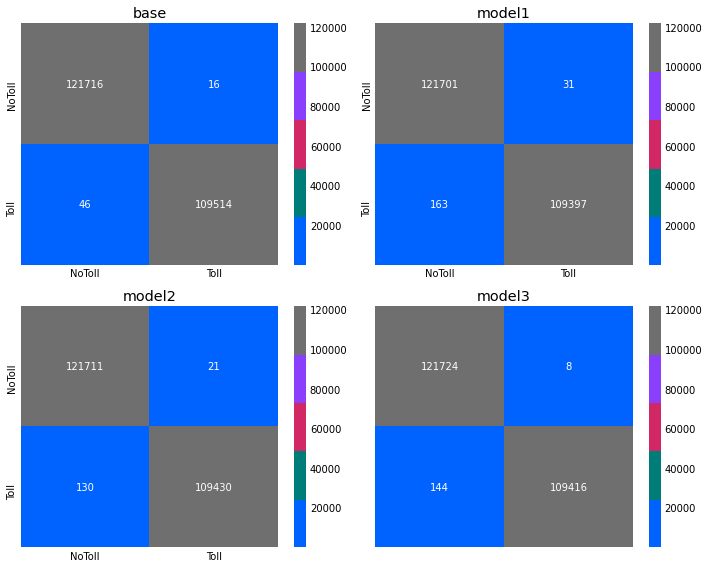

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(confusion_matrix(y_train, predictions.get(lab)[0]),
                ax=ax, annot=True, fmt='d', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

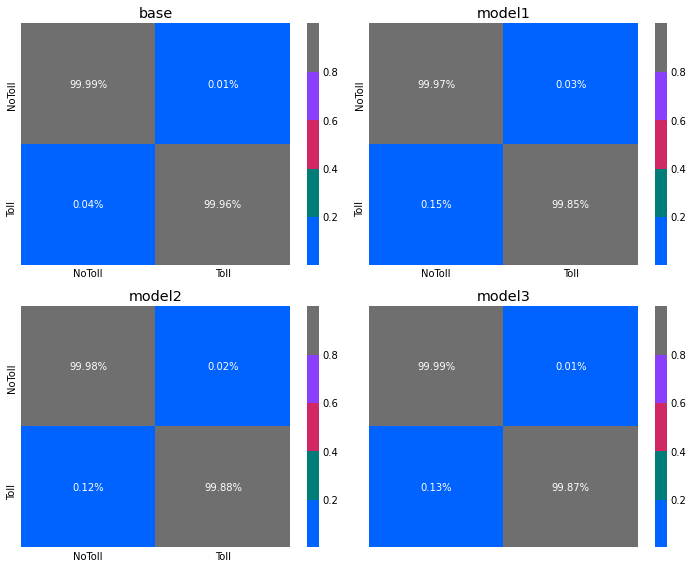

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    cm = confusion_matrix(y_train, predictions.get(lab)[0])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn,
                ax=ax, annot=True, fmt='.2%', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

## Validation Confusion Matrix

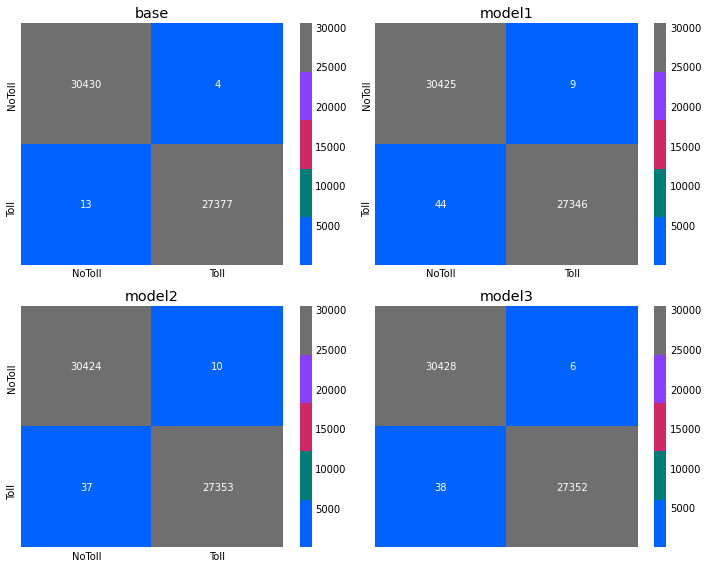

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(confusion_matrix(y_val, predictions.get(lab)[1]),
                ax=ax, annot=True, fmt='d', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

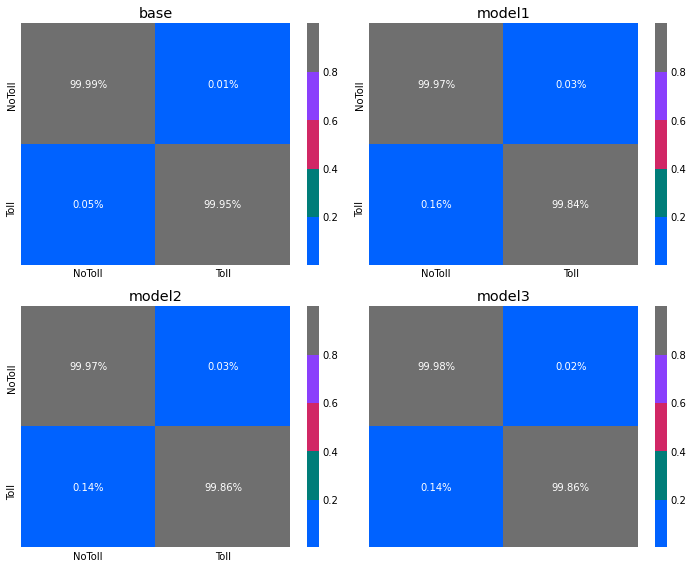

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    cm = confusion_matrix(y_val, predictions.get(lab)[1])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn,
                ax=ax, annot=True, fmt='.2%', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

## Test Confusion Matrix

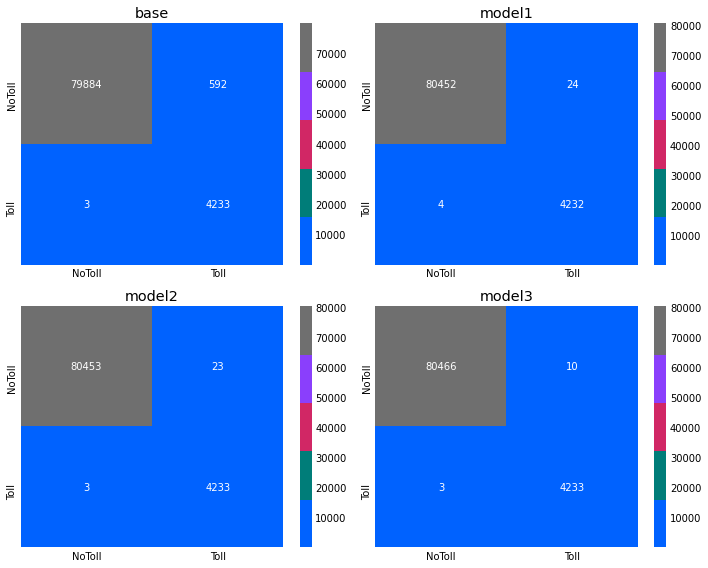

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

# axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(confusion_matrix(y_test, predictions.get(lab)[2]),
                ax=ax, annot=True, fmt='d', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()

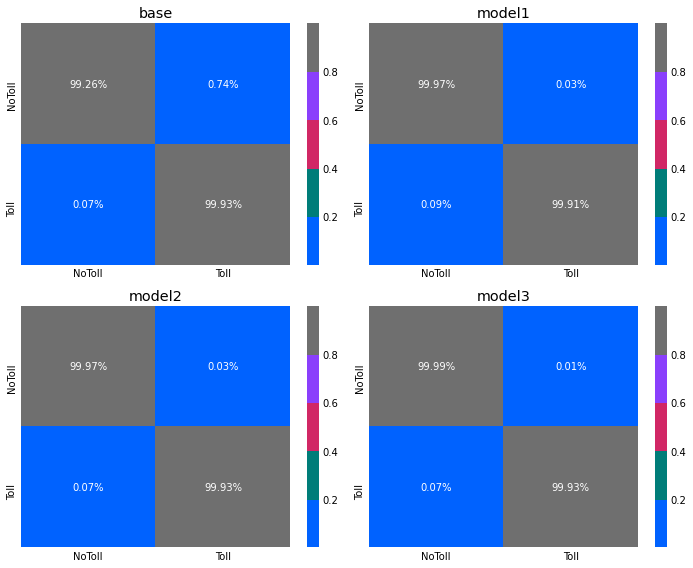

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 8)

# axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    cm = confusion_matrix(y_test, predictions.get(lab)[2])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn,
                ax=ax, annot=True, fmt='.2%', cmap=colors,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set(title=lab)
    
plt.tight_layout()